<a href="https://colab.research.google.com/github/paratesai316/Benign-vs-Malignant-Classification/blob/main/Tumor_Classification_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Benign vs Malignant Classification from Cropped Mammogram Lesions


Problem Statement :Breast cancer diagnosis depends on accurate differentiation between benign and malignant lesions. This project focuses on training a deep learning model to classify cropped regions of interest (ROIs) from mammograms as benign or malignant using the CBIS-DDSM dataset

Description : Breast cancer screening requires accurate distinction between benign and malignant lesions. This project uses cropped mammogram ROIs from the CBIS-DDSM dataset to train deep learning models. Pretrained CNNs (EfficientNet, DenseNet) are fine-tuned for binary classification with augmentation. The goal is to provide a solid baseline with AUROC ≥ 0.85 for reliable lesion diagnosis.

In [ ]:
#1 Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files

In [ ]:
#2 Load the csv
#uploaded = files.upload()
filename = '/content/mass_case_description_train_set.csv' #'/content/mass_case_description_train_set_augmented_10k.csv'
df = pd.read_csv(filename)

In [ ]:
#3 Data description
print("First 5 rows:\n", df.head())
print("\nData Info:\n")
df.info()
print("\nSummary statistics:\n", df.describe())
print("\nUnique pathology labels before normalization:")
print(df['pathology'].unique())


First 5 rows:
   patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT   

In [ ]:
#4 Data info & description
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

,breast_density,abnormality id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [ ]:
#4 Data Cleaning & filtering
df['pathology_normalized'] = df['pathology'].astype(str).str.strip().str.lower()
df = df[df['pathology_normalized'].isin(['benign', 'malignant'])].copy()
print(f"\nRows after filtering: {len(df)}")


Rows after filtering: 1214


In [ ]:
#5 Feature selection & encoding
features = [
      'breast_density',
      'left or right breast',
      'image view',
      'abnormality type',
      'mass shape',
      'mass margins',
      'assessment'
]

X = df[features].copy()
y = df['pathology_normalized'].copy()

for col in X.columns:
  if X[col].dtype == 'object':
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))

le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [ ]:
#6 Split data & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
if 'assessment' in X.columns:
  X_train.loc[:, 'assessment'] = scaler.fit_transform(X_train[['assessment']].astype(float))
  X_test.loc[:, 'assessment'] = scaler.transform(X_test[['assessment']].astype(float))

/tmp/ipython-input-3893200876.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-2.51517909  0.29927081  0.29927081 -0.40434167  1.00288328  0.29927081
 -2.51517909  0.29927081  0.29927081  0.29927081 -0.40434167  1.00288328
  0.29927081  0.29927081  0.29927081  0.29927081  1.00288328  0.29927081
  0.29927081  0.29927081  0.29927081  1.00288328  0.29927081  0.29927081
  0.29927081  0.29927081  0.29927081  1.00288328 -0.40434167 -0.40434167
  1.00288328 -0.40434167  1.00288328  0.29927081 -2.51517909 -0.40434167
 -2.51517909  0.29927081 -2.51517909  1.00288328  0.29927081 -0.40434167
  1.00288328 -2.51517909  0.29927081 -0.40434167  0.29927081 -0.40434167
  0.29927081  1.00288328  0.29927081  0.29927081  1.00288328 -2.51517909
  0.29927081 -1.10795414  0.29927081  0.29927081 -0.40434167  0.29927081
  0.29927081  1.00288328  0.29927081 -0.40434167  1.00288328  0.29927081
  0.29927081 -2.51517909 -2.51517909  0.299

In [ ]:
#7 Train model & evaluate
#First model implementation
#Accuracy stagnates at: 80.65%
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_y.classes_))


Accuracy: 0.8065843621399177

Classification Report:
              precision    recall  f1-score   support

      benign       0.78      0.80      0.79       111
   malignant       0.83      0.81      0.82       132

    accuracy                           0.81       243
   macro avg       0.81      0.81      0.81       243
weighted avg       0.81      0.81      0.81       243



In [ ]:
#Implements tensorflow and uses 100 epochs
#Accuracy stagnates at 79%

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

X_train_tensor = X_train.astype(np.float32).to_numpy()
X_test_tensor = X_test.astype(np.float32).to_numpy()

y_train_tensor = y_train.astype(np.float32)
y_test_tensor = y_test.astype(np.float32)

model = models.Sequential([
    layers.Input(shape=(X_train_tensor.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_tensor, y_train_tensor, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6086 - loss: 0.6322 - val_accuracy: 0.7128 - val_loss: 0.5583
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7750 - loss: 0.4874 - val_accuracy: 0.7385 - val_loss: 0.5053
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7680 - loss: 0.4739 - val_accuracy: 0.7385 - val_loss: 0.4784
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8115 - loss: 0.4118 - val_accuracy: 0.7436 - val_loss: 0.4620
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8226 - loss: 0.4047 - val_accuracy: 0.7949 - val_loss: 0.4372
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8214 - loss: 0.4137 - val_accuracy: 0.7744 - val_loss: 0.4387
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8121 - loss: 0.4086 - val_accuracy: 0.8256 - val_loss: 0.4128
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8348 - loss: 0.3955 - val_accuracy: 0.8256 - 

In [ ]:
#Better tensorflow implementation
#Accuracy stagnates at 80%

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np

X_train_tensor = X_train.astype(np.float32).to_numpy()
X_test_tensor = X_test.astype(np.float32).to_numpy()
y_train_tensor = y_train.astype(np.float32)
y_test_tensor = y_test.astype(np.float32)

model = models.Sequential([
    layers.Input(shape=(X_train_tensor.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_tensor, y_train_tensor,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5779 - loss: 0.8178 - val_accuracy: 0.7179 - val_loss: 0.5855
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7823 - loss: 0.5446 - val_accuracy: 0.7436 - val_loss: 0.5565
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7416 - loss: 0.5418 - val_accuracy: 0.7333 - val_loss: 0.5224
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7938 - loss: 0.4343 - val_accuracy: 0.7641 - val_loss: 0.5040
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8151 - loss: 0.4323 - val_accuracy: 0.7538 - val_loss: 0.4884
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8045 - loss: 0.4399 - val_accuracy: 0.7590 - val_loss: 0.4781
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7829 - loss: 0.4584 - val_accuracy: 0.7538 - val_loss: 0.4653
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7644 - loss: 0.4783 - val_accuracy: 0.8051 - 



```
One of the best model (below) with accuracy:
Highest recorded: 85.6%
Average: 83-84%
```



In [ ]:
#One of the best performing model
#Accuracy ranges 82-86%
#Average accuracy 84%

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd


categorical_features = [
    'mass shape',
    'mass margins',
    'breast_density',
    'left or right breast',
    'image view',
    'abnormality type'
]
numerical_features = ['assessment']

X_cat = df[categorical_features].copy()
for col in X_cat.columns:
  X_cat[col] = pd.Categorical(X_cat[col]).codes

X_num = df[numerical_features].astype(np.float32)

y = df['pathology_normalized'].map({'benign': 0, 'malignant': 1}).astype(np.float32)

from sklearn.model_selection import train_test_split
X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_cat, X_num, y, test_size=0.2, random_state=42
)

inputs = []
embeddings = []
for col in categorical_features:
    num_unique = X_cat[col].nunique()
    input_cat = layers.Input(shape=(1,), name=f'{col}_input')
    embed = layers.Embedding(input_dim=num_unique+1, output_dim=min(50, num_unique//2 + 1))(input_cat)
    embed = layers.Flatten()(embed)
    inputs.append(input_cat)
    embeddings.append(embed)

input_num = layers.Input(shape=(X_num_train.shape[1],), name='numeric_input')
inputs.append(input_num)

x = layers.concatenate(embeddings + [input_num])

x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_inputs = {f'{col}_input': X_cat_train[col].values for col in categorical_features}
train_inputs['numeric_input'] = X_num_train.values

test_inputs = {f'{col}_input': X_cat_test[col].values for col in categorical_features}
test_inputs['numeric_input'] = X_num_test.values

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_inputs,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model.evaluate(test_inputs, y_test)
print(f"Test Accuracy with embeddings: {accuracy:.4f}")


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5541 - loss: 0.7973 - val_accuracy: 0.6564 - val_loss: 0.6014
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7526 - loss: 0.4983 - val_accuracy: 0.6769 - val_loss: 0.5753
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7881 - loss: 0.4663 - val_accuracy: 0.8000 - val_loss: 0.5615
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4060 - val_accuracy: 0.8103 - val_loss: 0.5633
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8169 - loss: 0.4365 - val_accuracy: 0.7692 - val_loss: 0.5752
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8090 - loss: 0.4197 - val_accuracy: 0.6974 - val_loss: 0.6014
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8298 - loss: 0.3722 - val_accuracy: 0.7128 - val_loss: 0.5785
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8282 - loss: 0.4070 - val_accuracy: 0.7641

In [ ]:
#Implements 3 different model and gets average
#Not the best at accuracy
#Average accuracy: 79%

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv(filename)

df['pathology_normalized'] = df['pathology'].astype(str).str.strip().str.lower()
df = df[df['pathology_normalized'].isin(['benign', 'malignant'])].copy()

df['assessment_squared'] = df['assessment'] ** 2

categorical_features = [
    'mass shape', 'mass margins', 'breast_density',
    'left or right breast', 'image view', 'abnormality type'
]
numerical_features = ['assessment', 'assessment_squared']

for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X_cat = df[categorical_features].copy()
X_num = df[numerical_features].astype(np.float32)
y = df['pathology_normalized'].map({'benign': 0, 'malignant': 1}).astype(np.int32)

X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_cat, X_num, y, test_size=0.2, random_state=42
)


def create_nn():
    inputs = []
    embeddings = []

    for col in categorical_features:
        num_unique = df[col].nunique()
        input_cat = layers.Input(shape=(1,), name=f'{col}_input')
        embed_dim = min(50, max(1, num_unique // 2 + 1))
        embed = layers.Embedding(input_dim=num_unique + 1, output_dim=embed_dim)(input_cat)
        embed = layers.Flatten()(embed)
        inputs.append(input_cat)
        embeddings.append(embed)

    input_num = layers.Input(shape=(X_num_train.shape[1],), name='numeric_input')
    inputs.append(input_num)

    x = layers.concatenate(embeddings + [input_num])
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn()

train_inputs_nn = {f'{col}_input': X_cat_train[col].values for col in categorical_features}
train_inputs_nn['numeric_input'] = X_num_train.values

test_inputs_nn = {f'{col}_input': X_cat_test[col].values for col in categorical_features}
test_inputs_nn['numeric_input'] = X_num_test.values

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

nn_model.fit(
    train_inputs_nn,
    y_train,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

y_pred_nn_proba = nn_model.predict(test_inputs_nn).flatten()


X_train_xgb = pd.concat([X_cat_train, X_num_train], axis=1)
X_test_xgb = pd.concat([X_cat_test, X_num_test], axis=1)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist = {
    'max_depth': [3,5,7],
    'learning_rate': [0.01,0.05,0.1,0.2],
    'n_estimators': [100,200,300],
    'subsample': [0.7,0.8,1.0],
    'colsample_bytree': [0.7,0.8,1.0]
}

rand_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
rand_search.fit(X_train_xgb, y_train)
best_xgb = rand_search.best_estimator_

y_pred_xgb_proba = best_xgb.predict_proba(X_test_xgb)[:,1]


rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_xgb, y_train)
y_pred_rf_proba = rf.predict_proba(X_test_xgb)[:,1]


stack_train_pred = np.column_stack([
    best_xgb.predict_proba(X_train_xgb)[:,1],
    rf.predict_proba(X_train_xgb)[:,1],
    nn_model.predict(train_inputs_nn).flatten()
])

stack_test_pred = np.column_stack([
    y_pred_xgb_proba,
    y_pred_rf_proba,
    y_pred_nn_proba
])

meta_model = LogisticRegression(random_state=42)
meta_model.fit(stack_train_pred, y_train)

y_pred_ensemble = meta_model.predict(stack_test_pred)

acc = accuracy_score(y_test, y_pred_ensemble)
print(f"Stacking ensemble accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred_ensemble, target_names=['benign','malignant']))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
Fitting 3 folds for each of 10 candidates, totalling 30 fits
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Stacking ensemble accuracy: 0.7984
              precision    recall  f1-score   support

      benign       0.78      0.77      0.78       111
   malignant       0.81      0.82      0.82       132

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.80      0.80      0.80       243



In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


Implementing Hyperparameter tuning


In [ ]:
#Implements hyperparameter tuning to change configurations to get high accuracy
#Uses only keras
#High performance
#Average accuracy:

import keras_tuner as kt

def build_model(hp):
    inputs = []
    embeddings = []

    categorical_features = [
        'mass shape', 'mass margins', 'breast_density',
        'left or right breast', 'image view', 'abnormality type'
    ]
    numerical_features = ['assessment', 'assessment_squared']

    for col in categorical_features:
        num_unique = df[col].nunique()
        input_cat = layers.Input(shape=(1,), name=f'{col}_input')
        max_embed_dim = min(50, num_unique // 2 + 1)
        min_embed_dim = min(2, max_embed_dim) if max_embed_dim > 0 else 1
        embed_dim = hp.Int(f'{col}_embed_dim', min_value=min_embed_dim, max_value=max_embed_dim, step=1)
        embed = layers.Embedding(input_dim=num_unique + 1, output_dim=embed_dim)(input_cat)
        embed = layers.Flatten()(embed)
        inputs.append(input_cat)
        embeddings.append(embed)

    input_num = layers.Input(shape=(X_num_train.shape[1],), name='numeric_input')
    inputs.append(input_num)

    x = layers.concatenate(embeddings + [input_num])

    for i in range(hp.Int('num_dense_layers', min_value=1, max_value=4, step=1)):
        x = layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        )(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1))(x)

    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=output)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='keras_tuner_dir',
    project_name='mammogram_classification_tuning'
)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

train_inputs_tuner = {f'{col}_input': X_cat_train[col].values for col in categorical_features}
train_inputs_tuner['numeric_input'] = X_num_train.values

tuner.search(
    train_inputs_tuner,
    y_train,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters found: {best_hps.values}")

best_model = tuner.hypermodel.build(best_hps)

early_stop_final = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history_best_model = best_model.fit(
    train_inputs_tuner,
    y_train,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_final],
    verbose=1
)

test_inputs_best_model = {f'{col}_input': X_cat_test[col].values for col in categorical_features}
test_inputs_best_model['numeric_input'] = X_num_test.values

loss_tuned_nn, accuracy_tuned_nn = best_model.evaluate(test_inputs_best_model, y_test)
print(f"Test Accuracy with tuned NN: {accuracy_tuned_nn:.4f}")

Trial 10 Complete [00h 00m 40s]
val_accuracy: 0.8356164395809174

Best val_accuracy So Far: 0.8698630332946777
Total elapsed time: 00h 05m 13s
Best hyperparameters found: {'mass shape_embed_dim': 9, 'mass margins_embed_dim': 8, 'breast_density_embed_dim': 2, 'left or right breast_embed_dim': 2, 'image view_embed_dim': 2, 'abnormality type_embed_dim': 1, 'num_dense_layers': 1, 'units_0': 128, 'dropout_0': 0.4, 'learning_rate': 0.01, 'units_1': 224, 'dropout_1': 0.5, 'units_2': 64, 'dropout_2': 0.5, 'units_3': 192, 'dropout_3': 0.5}
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7334 - loss: 0.5181 - val_accuracy: 0.6918 - val_loss: 0.6236
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8429 - loss: 0.3842 - val_accuracy: 0.7466 - val_loss: 0.6216
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8616 - loss: 0.3382 - val_accuracy: 0.7945 - val_loss: 0.5757
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8384 - loss: 0.3678 

In [ ]:
#Implements hyperparameter tuning
#Uses keras, tensorflow and sklearn
#Decent performance
#Average accuracy: 81-82%

import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


def build_model(hp):
    inputs = []
    embeddings = []

    categorical_features = [
        'mass shape', 'mass margins', 'breast_density',
        'left or right breast', 'image view', 'abnormality type'
    ]
    numerical_features = ['assessment', 'assessment_squared']


    for col in categorical_features:
        num_unique = df[col].nunique()
        input_cat = layers.Input(shape=(1,), name=f'{col}_input')
        embed_dim = hp.Int(f'{col}_embed_dim', min_value=2, max_value=50, step=2)
        embed = layers.Embedding(input_dim=num_unique + 1, output_dim=embed_dim)(input_cat)
        embed = layers.Flatten()(embed)
        inputs.append(input_cat)
        embeddings.append(embed)

    input_num = layers.Input(shape=(X_num_train.shape[1],), name='numeric_input')
    inputs.append(input_num)

    x = layers.concatenate(embeddings + [input_num])

    for i in range(hp.Int('num_dense_layers', min_value=1, max_value=5)):
        x = layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid'])
        )(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.6, step=0.1))(x)

    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=output)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    if hp_optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='keras_tuner_dir',
    project_name='mammogram_classification_tuning_advanced'
)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

train_inputs_tuner = {f'{col}_input': X_cat_train[col].values for col in categorical_features}
train_inputs_tuner['numeric_input'] = X_num_train.values

tuner.search(
    train_inputs_tuner,
    y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters found: {best_hps.values}")

best_model = tuner.hypermodel.build(best_hps)

early_stop_final = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_best_model = best_model.fit(
    train_inputs_tuner,
    y_train,
    validation_split=0.15,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop_final],
    verbose=1
)

test_inputs_best_model = {f'{col}_input': X_cat_test[col].values for col in categorical_features}
test_inputs_best_model['numeric_input'] = X_num_test.values

loss_tuned_nn, accuracy_tuned_nn = best_model.evaluate(test_inputs_best_model, y_test)
print(f"Test Accuracy with tuned NN: {accuracy_tuned_nn:.4f}")

Trial 10 Complete [00h 00m 43s]
val_accuracy: 0.8595890402793884

Best val_accuracy So Far: 0.8664383590221405
Total elapsed time: 00h 08m 45s
Best hyperparameters found: {'mass shape_embed_dim': 10, 'mass margins_embed_dim': 2, 'breast_density_embed_dim': 10, 'left or right breast_embed_dim': 20, 'image view_embed_dim': 2, 'abnormality type_embed_dim': 28, 'num_dense_layers': 5, 'units_0': 480, 'activation_0': 'relu', 'dropout_0': 0.4, 'learning_rate': 0.001, 'optimizer': 'rmsprop', 'units_1': 512, 'activation_1': 'relu', 'dropout_1': 0.4, 'units_2': 96, 'activation_2': 'sigmoid', 'dropout_2': 0.2, 'units_3': 416, 'activation_3': 'sigmoid', 'dropout_3': 0.2, 'units_4': 384, 'activation_4': 'tanh', 'dropout_4': 0.30000000000000004}
Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.6458 - loss: 0.9663 - val_accuracy: 0.5685 - val_loss: 0.6727
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7068 - loss: 0.6929 - val_accuracy: 0.5685 - val_loss: 0.6770
Ep



```
# One of the best models (below)
```



--- Fold 1/5 ---
Fold 1 Test Accuracy: 0.8601
Confusion Matrix (Fold 1):
TP=111, TN=98, FP=17, FN=17


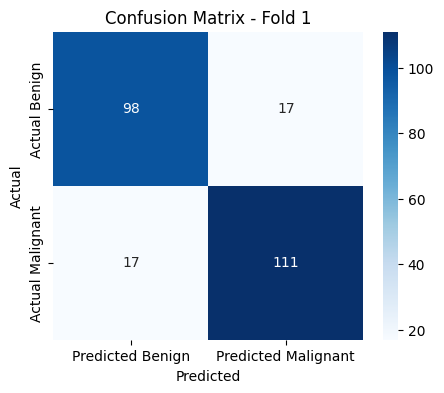

--- Fold 2/5 ---
Fold 2 Test Accuracy: 0.7942
Confusion Matrix (Fold 2):
TP=92, TN=101, FP=14, FN=36


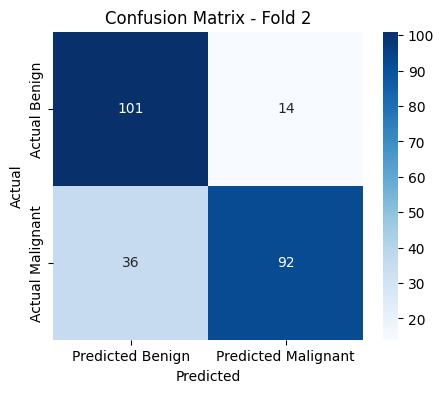

--- Fold 3/5 ---
Fold 3 Test Accuracy: 0.8148


Confusion Matrix (Fold 3):
TP=94, TN=104, FP=12, FN=33


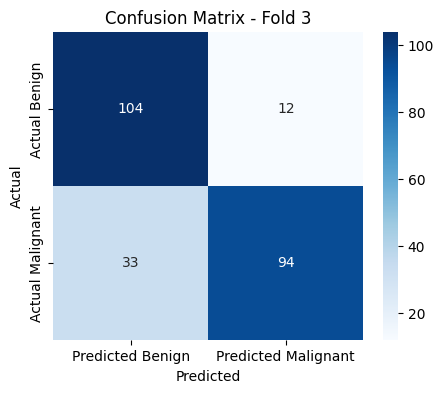

--- Fold 4/5 ---
Fold 4 Test Accuracy: 0.8477


Confusion Matrix (Fold 4):
TP=111, TN=95, FP=21, FN=16


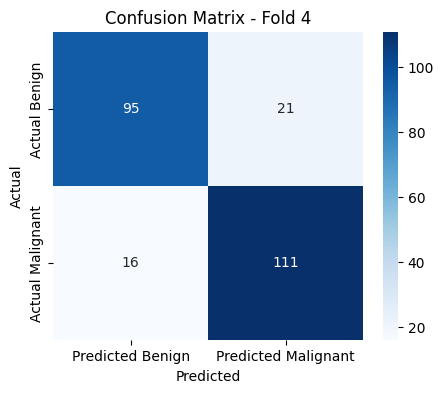

--- Fold 5/5 ---
Fold 5 Test Accuracy: 0.8678
Confusion Matrix (Fold 5):
TP=109, TN=101, FP=14, FN=18


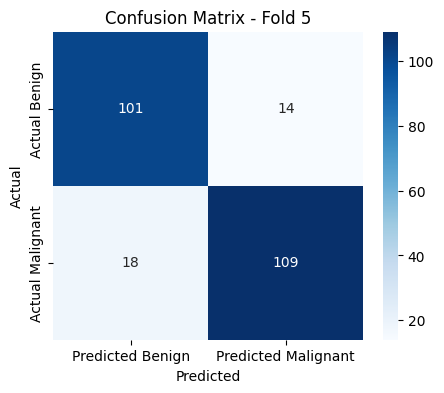


Mean Cross-Validation Accuracy: 0.8369
Standard Deviation of Cross-Validation Accuracy: 0.0280


In [ ]:
#Implements hyperparameter tuning
#Best hyperparamter tuning cases
#Takes 5 time average
#Extremely high accuracy
#Decently reliable
#Accuracy values may reach ~86.7% (max case)
#Average accuracy: 84-85%

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


############################
#Start of Data Preprocessing
############################

#Load csv
df = pd.read_csv(filename)

#Only keep benign or malignant cases
df['pathology_normalized'] = df['pathology'].astype(str).str.strip().str.lower()
df = df[df['pathology_normalized'].isin(['benign', 'malignant'])].copy()

#Add square features
if 'assessment_squared' not in df.columns:
    df['assessment_squared'] = df['assessment'] ** 2

if df['breast_density'].dtype == 'object':
    df['breast_density_encoded'] = LabelEncoder().fit_transform(df['breast_density'].astype(str))
    df['assessment_density_interaction'] = df['assessment'] * df['breast_density_encoded']
    categorical_features = [
        'mass shape', 'mass margins',
        'left or right breast', 'image view', 'abnormality type', 'breast_density_encoded' #Use encoded breast_density
    ]
else:
    df['assessment_density_interaction'] = df['assessment'] * df['breast_density']
    categorical_features = [
        'mass shape', 'mass margins',
        'left or right breast', 'image view', 'abnormality type'
    ]

#Define numerical features
numerical_features = ['assessment', 'assessment_squared', 'assessment_density_interaction']

#Encode categorical features
for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

##########################
#End of data preprocessing
##########################

###########################
#Start of Feature Splitting
###########################

X_cat = df[categorical_features].copy()
X_num = df[numerical_features].astype(np.float32)
y = df['pathology_normalized'].map({'benign': 0, 'malignant': 1}).astype(np.int32)

#Combine categorical and numerical features for cross validation
X_combined = pd.concat([X_cat, X_num], axis=1)

#########################
#End of Feature Splitting
#########################

############################
#Start of Model Architecture
############################

# Define the model building function
#Also uses hyperparameter tuning
def build_model_with_regularization(l2_lambda=0.0001):
    inputs = []
    embeddings = []

    #Categorical features & embedding layers
    categorical_features_model = [
        'mass shape', 'mass margins',
        'left or right breast', 'image view', 'abnormality type'
    ]
    if 'breast_density_encoded' in X_cat.columns:
         categorical_features_model.append('breast_density_encoded')

    numerical_features_model = ['assessment', 'assessment_squared', 'assessment_density_interaction']

    #Build embedding inputs for categorical features
    for col in categorical_features_model:
        num_unique = df[col].nunique()
        input_cat = layers.Input(shape=(1,), name=f'{col}_input')
        embed_dim = 32 #Default embed size (can be changed)
        try:
            embed_dim = best_hps.get(f'{col}_embed_dim')
        except NameError:
            #print(f"Warning: best_hps not found. Using default embed_dim={embed_dim} for {col}")
            pass

        embed = layers.Embedding(input_dim=num_unique + 1, output_dim=embed_dim)(input_cat)
        embed = layers.Flatten()(embed)
        inputs.append(input_cat)
        embeddings.append(embed)

    #Input for numerical features
    input_num = layers.Input(shape=(X_num.shape[1],), name='numeric_input')
    inputs.append(input_num)

    #Concatenate embeddings + numeric inputs
    x = layers.concatenate(embeddings + [input_num])

    num_dense_layers = 3
    try:
        num_dense_layers = best_hps.get('num_dense_layers')
    except NameError:
        #print(f"Warning: best_hps not found. Using default num_dense_layers={num_dense_layers}")
        pass

    #Dense hidden layers with dropout + batch norm + L2 regularization
    for i in range(num_dense_layers):
        units = 128 #Number of neurons per layer (tunable)
        activation = 'relu' #Rectified Linear Units
        dropout_rate = 0.3 #30% of neurons dropped randomly to prevent overfitting
        try:
            units = best_hps.get(f'units_{i}')
            activation = best_hps.get(f'activation_{i}')
            dropout_rate = best_hps.get(f'dropout_{i}')
        except NameError:
            #print(f"Warning: best_hps not found. Using default units={units}, activation={activation}, dropout={dropout_rate} for layer {i}")
            pass


        x = layers.Dense(
            units=units,
            activation=activation,
            kernel_regularizer=regularizers.l2(l2_lambda)
        )(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)

    #Output layer
    output = layers.Dense(1, activation='sigmoid')(x)
    #One neuron in output layer
    #Sigmoid checks value to return accuracy between 0 & 1 for malignant or benign

    #Compile model
    model = models.Model(inputs=inputs, outputs=output)

    hp_optimizer = 'adam'
    hp_learning_rate = 0.001

    try:
        hp_optimizer = best_hps.get('optimizer')
        hp_learning_rate = best_hps.get('learning_rate')
    except NameError:
        #print(f"Warning: best_hps not found. Using default optimizer={hp_optimizer}, learning_rate={hp_learning_rate}")
        pass


    if hp_optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
        #Adam optimiser combines momentum (past direction of updates) and adaptive learning rate
        #Learning_rate=0.001 controls how big each step is when updating weights
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate)


    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

##########################
#End of Model Architecture
##########################

############################################
#Start of Stratified K-Fold Cross Validation
############################################

n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
#Divides data into 5 equal parts
#Train model on K-1 folds and test it on remaining folds
#Repeat across remaining K values and take average of accuracy
#Stratified allows for proportional splits of datasets based on benign or malignant values
#Data is shuffled and randomized


fold_accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X_combined, y)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    #Split into train/test for this fold
    X_train_fold = X_combined.iloc[train_index]
    y_train_fold = y.iloc[train_index]
    X_test_fold = X_combined.iloc[test_index]
    y_test_fold = y.iloc[test_index]

    #Separate categorical and numerical for for this fold
    categorical_features_fold = [col for col in categorical_features if col in X_train_fold.columns]
    numerical_features_fold = [col for col in numerical_features if col in X_train_fold.columns]

    X_cat_train_fold = X_train_fold[categorical_features_fold].copy()
    X_num_train_fold = X_train_fold[numerical_features_fold].astype(np.float32)
    X_cat_test_fold = X_test_fold[categorical_features_fold].copy()
    X_num_test_fold = X_test_fold[numerical_features_fold].astype(np.float32)


    #Build new model for this fold
    model_fold = build_model_with_regularization(l2_lambda=0.0001)

    #Format inputs for Keras
    train_inputs_fold = {f'{col}_input': X_cat_train_fold[col].values for col in categorical_features_fold}
    train_inputs_fold['numeric_input'] = X_num_train_fold.values

    test_inputs_fold = {f'{col}_input': X_cat_test_fold[col].values for col in categorical_features_fold}
    test_inputs_fold['numeric_input'] = X_num_test_fold.values


    #Early stopping callback
    early_stop_fold = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    #Train mmodel
    history_fold = model_fold.fit(
        train_inputs_fold,
        y_train_fold,
        validation_split=0.15, #15% data used for validation
        epochs=150, #Maximum training epochs
        batch_size=32,
        callbacks=[early_stop_fold],
        verbose=0
    )

    #Evaluate model
    loss_fold, accuracy_fold = model_fold.evaluate(test_inputs_fold, y_test_fold, verbose=0)
    print(f"Fold {fold+1} Test Accuracy: {accuracy_fold:.4f}")
    fold_accuracies.append(accuracy_fold)

    #Confusion Matrix Section
    #Get predicted probabilities
    y_pred_probs = model_fold.predict(test_inputs_fold, verbose=0)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    cm = confusion_matrix(y_test_fold, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"Confusion Matrix (Fold {fold+1}):")
    print(f"TP={tp}, TN={tn}, FP={fp}, FN={fn}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted Benign', 'Predicted Malignant'],
                yticklabels=['Actual Benign', 'Actual Malignant'])
    plt.title(f"Confusion Matrix - Fold {fold+1}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


##########################################
#End of Stratified K-Fold Cross Validation
##########################################

#################################
#Start of Final Results & Summary
#################################

mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"\nMean Cross-Validation Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.4f}")

###############################
#End of Final Results & Summary
###############################

In [ ]:
#Hyperparameter implementation
#Uses sklearn, tensorflow, xgboost
#Stagnates at 82.3%

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import warnings

warnings.filterwarnings('ignore')

df['pathology_normalized'] = df['pathology'].astype(str).str.strip().str.lower()
df = df[df['pathology_normalized'].isin(['benign', 'malignant'])].copy()

df['assessment_squared'] = df['assessment'] ** 2
if df['breast_density'].dtype == 'object':
    df['breast_density_encoded'] = LabelEncoder().fit_transform(df['breast_density'].astype(str))
    df['assessment_density_interaction'] = df['assessment'] * df['breast_density_encoded']
    categorical_features = [
        'mass shape', 'mass margins',
        'left or right breast', 'image view', 'abnormality type', 'breast_density_encoded'
    ]
else:
    df['assessment_density_interaction'] = df['assessment'] * df['breast_density']
    categorical_features = [
        'mass shape', 'mass margins',
        'left or right breast', 'image view', 'abnormality type'
    ]
numerical_features = ['assessment', 'assessment_squared', 'assessment_density_interaction']

for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X_cat = df[categorical_features].copy()
X_num = df[numerical_features].astype(np.float32)
y = df['pathology_normalized'].map({'benign': 0, 'malignant': 1}).astype(np.int32)

X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_cat, X_num, y, test_size=0.2, random_state=42
)

X_train_tree = pd.concat([X_cat_train, X_num_train], axis=1)
X_test_tree = pd.concat([X_cat_test, X_num_test], axis=1)


def create_nn_model():
    inputs = []
    embeddings = []

    categorical_features_model = [
        'mass shape', 'mass margins',
        'left or right breast', 'image view', 'abnormality type'
    ]
    if 'breast_density_encoded' in X_cat.columns:
         categorical_features_model.append('breast_density_encoded')

    numerical_features_model = ['assessment', 'assessment_squared', 'assessment_density_interaction']


    for col in categorical_features_model:
        num_unique = df[col].nunique()
        input_cat = layers.Input(shape=(1,), name=f'{col}_input')

        embed_dim = 32
        embed = layers.Embedding(input_dim=num_unique + 1, output_dim=embed_dim)(input_cat)
        embed = layers.Flatten()(embed)
        inputs.append(input_cat)
        embeddings.append(embed)

    input_num = layers.Input(shape=(X_num_train.shape[1],), name='numeric_input')
    inputs.append(input_num)

    x = layers.concatenate(embeddings + [input_num])

    num_dense_layers = 3
    for i in range(num_dense_layers):
        units = 128
        activation = 'relu'
        dropout_rate = 0.3
        x = layers.Dense(units=units, activation=activation)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)

    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=output)

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

nn_model = create_nn_model()

train_inputs_nn = {f'{col}_input': X_cat_train[col].values for col in categorical_features}
train_inputs_nn['numeric_input'] = X_num_train.values

test_inputs_nn = {f'{col}_input': X_cat_test[col].values for col in categorical_features}
test_inputs_nn['numeric_input'] = X_num_test.values

early_stop_nn = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

nn_model.fit(
    train_inputs_nn, y_train,
    validation_split=0.15,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop_nn],
    verbose=0
)

y_pred_nn_proba = nn_model.predict(test_inputs_nn).flatten()
y_train_nn_proba = nn_model.predict(train_inputs_nn).flatten()

xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42,
                    max_depth=5, learning_rate=0.1, n_estimators=200, subsample=0.8, colsample_bytree=0.8)

xgb.fit(X_train_tree, y_train)

y_pred_xgb_proba = xgb.predict_proba(X_test_tree)[:, 1]
y_train_xgb_proba = xgb.predict_proba(X_train_tree)[:, 1]

rf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=10, min_samples_leaf=5)
rf.fit(X_train_tree, y_train)

y_pred_rf_proba = rf.predict_proba(X_test_tree)[:, 1]
y_train_rf_proba = rf.predict_proba(X_train_tree)[:, 1]

stack_train_pred = np.column_stack([
    y_train_xgb_proba,
    y_train_rf_proba,
    y_train_nn_proba
])

stack_test_pred = np.column_stack([
    y_pred_xgb_proba,
    y_pred_rf_proba,
    y_pred_nn_proba
])

meta_model = LogisticRegression(random_state=42)
meta_model.fit(stack_train_pred, y_train)

y_pred_ensemble = meta_model.predict(stack_test_pred)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Stacking Ensemble Accuracy: {accuracy_ensemble:.4f}")
print("\nClassification Report for Stacking Ensemble:")
print(classification_report(y_test, y_pred_ensemble, target_names=['benign', 'malignant']))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Stacking Ensemble Accuracy: 0.8272

Classification Report for Stacking Ensemble:
              precision    recall  f1-score   support

      benign       0.82      0.79      0.81       111
   malignant       0.83      0.86      0.84       132

    accuracy                           0.83       243
   macro avg       0.83      0.82      0.83       243
weighted avg       0.83      0.83      0.83       243



In [ ]:
#Uses keras, tensorflow and sklearn
#Makes use of hyperparameter tuning and makes 20 trials to have best hyperparameter weightages
#Has very high runtime
#Average accuracy of 82-83%

import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def build_model_for_tuning(hp, categorical_features_model, numerical_features_model):
    inputs = []
    embeddings = []

    for col in categorical_features_model:

        num_unique = df[col].nunique()
        input_cat = layers.Input(shape=(1,), name=f'{col}_input')

        embed_dim = hp.Int(f'{col}_embed_dim', min_value=2, max_value=min(50, num_unique * 2), step=2)
        embed = layers.Embedding(input_dim=num_unique + 1, output_dim=embed_dim)(input_cat)
        embed = layers.Flatten()(embed)
        inputs.append(input_cat)
        embeddings.append(embed)

    input_num = layers.Input(shape=(len(numerical_features_model),), name='numeric_input')
    inputs.append(input_num)

    x = layers.concatenate(embeddings + [input_num])

    for i in range(hp.Int('num_dense_layers', min_value=1, max_value=4)):
        x = layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])
        )(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1))(x)

    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=output)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    if hp_optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

categorical_features_initial = [
    'mass shape', 'mass margins', 'breast_density',
    'left or right breast', 'image view', 'abnormality type'
]
numerical_features_initial = ['assessment', 'assessment_squared']

X_cat = df[categorical_features_initial].copy()
X_num = df[numerical_features_initial].astype(np.float32)
y = df['pathology_normalized'].map({'benign': 0, 'malignant': 1}).astype(np.int32)

X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_cat, X_num, y, test_size=0.2, random_state=42
)

categorical_features_split = X_cat_train.columns.tolist()
numerical_features_split = X_num_train.columns.tolist()

tuner = kt.RandomSearch(
    lambda hp: build_model_for_tuning(hp, categorical_features_split, numerical_features_split),
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='keras_tuner_dir',
    project_name='mammogram_classification_tuning_re_run_smaller'
)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

train_inputs_tuner = {f'{col}_input': X_cat_train[col].values for col in categorical_features_split}
train_inputs_tuner['numeric_input'] = X_num_train.values

tuner.search(
    train_inputs_tuner,
    y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)

best_hps_re_run = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest hyperparameters found in re-run:")
for param, value in best_hps_re_run.values.items():
    print(f"  {param}: {value}")

best_model_re_run = build_model_for_tuning(best_hps_re_run, categorical_features_split, numerical_features_split)

early_stop_final_re_run = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_best_model_re_run = best_model_re_run.fit(
    train_inputs_tuner,
    y_train,
    validation_split=0.15,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop_final_re_run],
    verbose=1
)
test_inputs_best_model_re_run = {f'{col}_input': X_cat_test[col].values for col in categorical_features_split}
test_inputs_best_model_re_run['numeric_input'] = X_num_test.values

loss_tuned_nn_re_run, accuracy_tuned_nn_re_run = best_model_re_run.evaluate(test_inputs_best_model_re_run, y_test)
print(f"Test Accuracy with re-tuned NN: {accuracy_tuned_nn_re_run:.4f}")

Trial 20 Complete [00h 00m 49s]
val_accuracy: 0.8630137145519257

Best val_accuracy So Far: 0.8698630332946777
Total elapsed time: 00h 11m 58s

Best hyperparameters found in re-run:
  mass shape_embed_dim: 26
  mass margins_embed_dim: 2
  breast_density_embed_dim: 2
  left or right breast_embed_dim: 2
  image view_embed_dim: 4
  abnormality type_embed_dim: 2
  num_dense_layers: 1
  units_0: 224
  activation_0: relu
  dropout_0: 0.4
  learning_rate: 0.001
  optimizer: rmsprop
  units_1: 32
  activation_1: relu
  dropout_1: 0.2
  units_2: 32
  activation_2: tanh
  dropout_2: 0.4
Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7237 - loss: 0.5259 - val_accuracy: 0.6644 - val_loss: 0.5481
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8067 - loss: 0.4225 - val_accuracy: 0.8014 - val_loss: 0.5178
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8083 - loss: 0.4039 - val_accuracy: 0.8014 - val_loss: 0.5252
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━